In [2]:
# Data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# MODEL
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Some functions used before and after the model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Errors and data representation
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.simplefilter(action = "ignore")


In [4]:
df = pd.read_csv('Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
                   ..
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Length: 21, dtype: int64

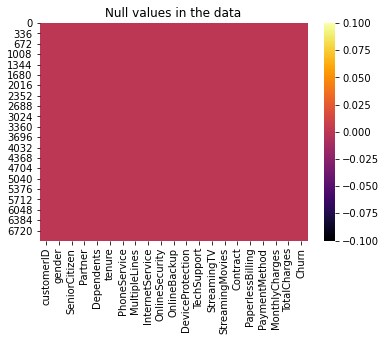

In [8]:
plt.title("Null values in the data", fontsize = 12)
sns.heatmap(df.isnull(), cmap = 'inferno')
plt.show()

In [9]:
data = df.copy()

In [10]:
data.drop('customerID', axis=1, inplace=True)

In [11]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('O')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [12]:
data[data['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,nan,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,nan,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,nan,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,nan,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,nan,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,nan,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,nan,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,nan,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,nan,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,nan,No


In [14]:
null_values = data[data['TotalCharges'].isnull()].index.to_list()
data.loc[data.index.isin(null_values), 
       'TotalCharges'] = data.loc[data.index.isin(null_values), 'MonthlyCharges']

In [15]:
data[data.index.isin(null_values)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


#### I'm determining the columns types but first I'll create a function for this.


In [16]:
def grab_cols(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns  # Categorical
                if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns
                   if dataframe[col].nunique() < cat_th and  # Numeric but categorical
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns
                   if dataframe[col].nunique() > car_th and  # Categorical but high cardinal
                   dataframe[col].dtypes == "O"]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes not in ['O', 'datetime64[ns]'] and
                dataframe[col].nunique() > 10]  # Numeric
    return cat_cols, num_but_cat, cat_but_car, num_cols

In [17]:
cat_cols, num_but_cat, cat_but_car, num_cols = grab_cols(data)

In [18]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [19]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

#### I'll transform datatype object to numeric for target variable because of using correlation other variables

In [20]:
data['Churn'] = np.where(data['Churn'] == 'Yes', 1, 0)

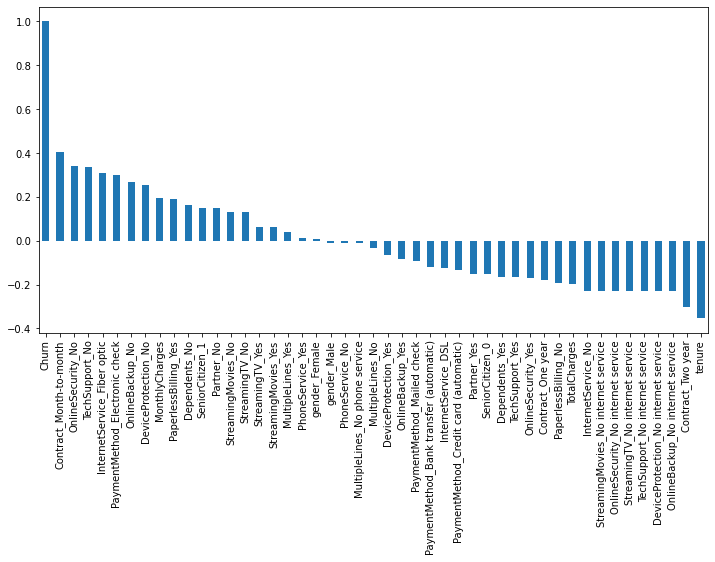

In [21]:
plt.figure(figsize=(12,6))
(pd.get_dummies(data).corr()['Churn']).sort_values(ascending=False).plot(kind='bar');

### correlation between the target variable and the independent variables

Text(0.5, 1.0, 'Correlation HeatMap')

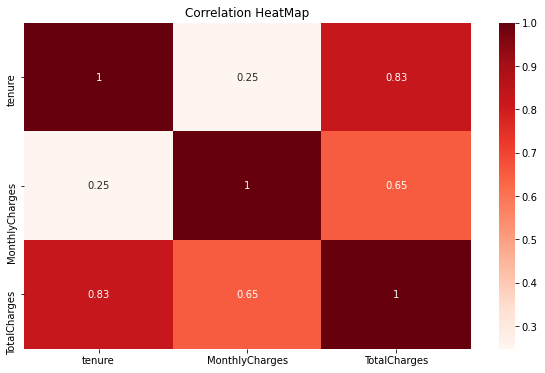

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='Reds')
plt.title('Correlation HeatMap')

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

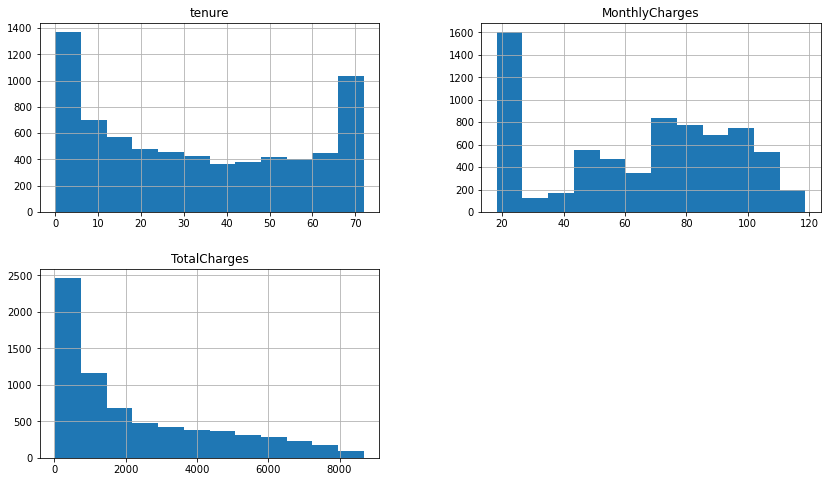

In [23]:
data[num_cols].hist(figsize = (14,8), bins=12)

### Outliers

In [24]:
def outliers_threshold(dataframe, column):
    q1 = dataframe[column].quantile(0.05)
    q3 = dataframe[column].quantile(0.95)
    inter_quartile_range = q3 - q1
    low = q1 - 1.5 * inter_quartile_range
    up = q3 + 1.5 * inter_quartile_range
    return low, up

In [25]:
def grab_outlier(dataframe, column, index=False):
    low, up = outliers_threshold(dataframe, column)
    if dataframe[(dataframe[column] < low) |
                 (dataframe[column] > up)].shape[0] < 10:
        print(dataframe[(dataframe[column] < low) | (dataframe[column] > up)])
    else:
        print(dataframe[(dataframe[column] < low) |
                 (dataframe[column] > up)].head())
    if index:
        outlier_index = dataframe[(dataframe[column] < low) |
                                  (dataframe[column] > up)].index
        return outlier_index

In [26]:
for col in num_cols:
    grab_outlier(data[num_cols], col)

Empty DataFrame
Columns: [tenure, MonthlyCharges, TotalCharges]
Index: []
Empty DataFrame
Columns: [tenure, MonthlyCharges, TotalCharges]
Index: []
Empty DataFrame
Columns: [tenure, MonthlyCharges, TotalCharges]
Index: []


There is not an outlier observation in the numeric columns

### Feature Engineering

In [27]:
data[['tenure', 'MonthlyCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


In [28]:
data[data['tenure'] == 0]['Churn']

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: Churn, dtype: int32

I separate the tenure and MonthlyCharges values into different segments

In [29]:
data['new_tenure_segment'] = pd.cut(data['tenure'], bins=[0, 0.5, 30, 60, 100],
                                 labels=['New', 'Low', 'Medium', 'High']).astype('O')

In [30]:
data['new_MonhlyCharges_segment'] = pd.cut(data['MonthlyCharges'], bins=[0, 70, 90, 120],
                                 labels=['Low', 'Medium', 'High']).astype('O')

In [31]:
churn_to_segment = data.groupby(['Churn', 'new_tenure_segment'])\
.agg({'new_tenure_segment': 'count'}).unstack().T.reset_index().drop('level_0', axis=1)
churn_to_segment.columns = ['new_tenure_segment', 'Churn_0', 'Churn_1']
churn_to_segment['Churn_Ratio'] = churn_to_segment['Churn_1']*100\
/(churn_to_segment['Churn_0'] + churn_to_segment['Churn_1'])
churn_to_segment.sort_values('Churn_Ratio', ascending=False)

,new_tenure_segment,Churn_0,Churn_1,Churn_Ratio
1,Low,2205,1425,39.26
2,Medium,1644,351,17.59
0,High,1314,93,6.61


When we look at the tenure segment, it is seen that users with high tenure values are less churn.

In [32]:
churn_to_mcharges = data.groupby(['Churn', 'new_MonhlyCharges_segment'])\
.agg({'new_MonhlyCharges_segment': 'count'}).unstack().T.reset_index()\
.drop('level_0', axis=1)
churn_to_mcharges.columns = ['new_MonhlyCharges_segment', 'Churn_0', 'Churn_1']
churn_to_mcharges['Churn_Ratio'] = churn_to_mcharges['Churn_1']*100\
/(churn_to_mcharges['Churn_0'] + churn_to_mcharges['Churn_1'])
churn_to_mcharges.sort_values('Churn_Ratio', ascending=False)

,new_MonhlyCharges_segment,Churn_0,Churn_1,Churn_Ratio
2,Medium,1147,697,37.80
0,High,1169,570,32.78
1,Low,2858,602,17.40


### Customer Segmentation

In [33]:
scaler = MinMaxScaler(feature_range=(1, 10))
scaler.fit(data[['tenure', 'MonthlyCharges']])
data[['tenure_scaled', 'MonthlyCharges_scaled']] = scaler\
.transform(data[['tenure', 'MonthlyCharges']])

In [34]:
# New scaled range 1-10
data[['tenure', 'tenure_scaled', 'MonthlyCharges', 'MonthlyCharges_scaled']].head(10)

,tenure,tenure_scaled,MonthlyCharges,MonthlyCharges_scaled
0,1,1.12,29.85,2.04
1,34,5.25,56.95,4.47
2,2,1.25,53.85,4.19
3,45,6.62,42.30,3.15
4,2,1.25,70.70,5.70
5,8,2.00,99.65,8.29
6,22,3.75,89.10,7.34
7,10,2.25,29.75,2.03
8,28,4.50,104.80,8.75
9,62,8.75,56.15,4.39


In [35]:
data['segment_score_1'] = (0.65 * data['tenure_scaled'] + 0.35 * data['MonthlyCharges_scaled'])
data['segment_1'] = pd.qcut(data['segment_score_1'], 5, labels=['E', 'D', 'C', 'B', 'A']).astype('O')


In [36]:
data[['segment_score_1', 'segment_1']].head(10)

,segment_score_1,segment_1
0,1.44,E
1,4.98,C
2,2.28,E
3,5.41,C
4,2.81,D
5,4.20,C
6,5.01,C
7,2.17,E
8,5.99,B
9,7.23,B


In [37]:
churn_to_segment_1 = data.groupby(['Churn', 'segment_1'])\
.agg({'segment_1':'count'}).unstack().T.reset_index().drop('level_0', axis=1)
churn_to_segment_1.columns = ['segment_1', 'Churn_0', 'Churn_1']
churn_to_segment_1['Churn_Ratio'] = churn_to_segment_1['Churn_1']*100\
/(churn_to_segment_1['Churn_0'] + churn_to_segment_1['Churn_1'])
churn_to_segment_1.sort_values('Churn_Ratio', ascending=True)

,segment_1,Churn_0,Churn_1,Churn_Ratio
0,A,1240,169,11.99
1,B,1163,245,17.40
2,C,1016,393,27.89
4,E,950,459,32.58
3,D,805,603,42.83


In [38]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,new_tenure_segment,new_MonhlyCharges_segment,tenure_scaled,MonthlyCharges_scaled,segment_score_1,segment_1
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low,Low,1.12,2.04,1.44,E
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,Medium,Low,5.25,4.47,4.98,C
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Low,Low,1.25,4.19,2.28,E
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Medium,Low,6.62,3.15,5.41,C
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Low,Medium,1.25,5.70,2.81,D


In [39]:
# I'll drop these columns. I won't use them anymore.
data.drop(['tenure_scaled', 'segment_score_1', 'MonthlyCharges_scaled', 'tenure', 'MonthlyCharges'], 
        axis=1, inplace=True)

In [40]:
data['Churn'] = data['Churn'].astype('O')

### Encoding

In [41]:
binary_cols = [col for col in data.columns if data[col].nunique() == 2]
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [42]:
multi_col = [col for col in data.columns if data[col].nunique() > 2 and data[col].dtypes == 'O']
multi_col

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'new_tenure_segment',
 'new_MonhlyCharges_segment',
 'segment_1']

In [43]:
num_col = [col for col in data.columns if data[col].dtypes in ['float64', 'int64']]
num_col

['TotalCharges']

### Functions

In [44]:
def label_encoder(dataframe, binary_col):
    labelencoder = preprocessing.LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [45]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols,
                               drop_first=drop_first)
    return dataframe

### Label Encoding

In [46]:
for col in binary_cols:
    label_encoder(data, col)

### One-Hot Encoding (with two step)


In [47]:
# These columns include same information that are no internet service and no phone service
dummy_diff = ['OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 
              'StreamingTV', 'StreamingMovies', 
              'MultipleLines']


In [48]:
data = one_hot_encoder(data, dummy_diff, drop_first=False)

In [49]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,new_tenure_segment,new_MonhlyCharges_segment,segment_1,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0,0,DSL,Month-to-month,1,Electronic check,29.85,0,Low,Low,E,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,1,0,0,0,1,DSL,One year,0,Mailed check,1889.50,0,Medium,Low,C,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,DSL,Month-to-month,1,Mailed check,108.15,1,Low,Low,E,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,0,DSL,One year,0,Bank transfer (automatic),1840.75,0,Medium,Low,C,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,1,Fiber optic,Month-to-month,1,Electronic check,151.65,1,Low,Medium,D,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


#### Now, I creating a droplist to drop duplicated dummy features

In [50]:
drop_list = data.columns[data.columns.str.contains(pat = 'No internet service')].to_list()
drop_list.append('MultipleLines_No phone service')
drop_list

['OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'MultipleLines_No phone service']

In [51]:
data.drop(drop_list, axis=1, inplace=True)

Now, I'll convert remaining properties to dummy variable but i will set drop first argument to True

In [52]:
# Difference list
dummy = list(set(multi_col) - set(dummy_diff))
dummy

['Contract',
 'PaymentMethod',
 'InternetService',
 'segment_1',
 'new_tenure_segment',
 'new_MonhlyCharges_segment']

In [53]:
data = one_hot_encoder(data, dummy, drop_first=True)

In [54]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,TotalCharges,Churn,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,segment_1_B,segment_1_C,segment_1_D,segment_1_E,new_tenure_segment_Low,new_tenure_segment_Medium,new_MonhlyCharges_segment_Low,new_MonhlyCharges_segment_Medium
0,0,0,1,0,0,1,29.85,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
1,1,0,0,0,1,0,1889.50,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
2,1,0,0,0,1,1,108.15,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0
3,1,0,0,0,0,0,1840.75,0,0,1,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,1,1,151.65,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1


### Split Data

In [55]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Scaling

In [56]:
scaler = StandardScaler().fit(X_train[num_col])
X_train[num_col] = scaler.transform(X_train[num_col])

scaler = StandardScaler().fit(X_test[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [57]:
X_train.shape, X_test.shape

((5282, 36), (1761, 36))

### Model

I'm checking to balance of target data

In [62]:
print(' Churn No Ratio: ', round(data['Churn'].value_counts()[0]/data.shape[0] ,2), '\n', 
      'Churn Yes Ratio: ', round(data['Churn'].value_counts()[1]/data.shape[0] ,2))

 Churn No Ratio:  0.73 
 Churn Yes Ratio:  0.27


In [65]:
models = [('LR', LogisticRegression(solver='liblinear')),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVC', SVC(gamma='auto')),
          ('GB',GradientBoostingClassifier())]
       

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.804770 (0.007774)
KNN: 0.751953 (0.009560)
CART: 0.733776 (0.013974)
RF: 0.784886 (0.018893)
SVC: 0.763880 (0.011607)
GB: 0.805338 (0.012255)


### Logistic Regression

In [66]:
loj = LogisticRegression(solver='liblinear')
loj_model = loj.fit(X_train, y_train)
y_pred = loj_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1170,  109],
       [ 225,  257]], dtype=int64)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1279
           1       0.70      0.53      0.61       482

    accuracy                           0.81      1761
   macro avg       0.77      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



#### Precision and recall are quite low    

In [68]:
LR = [0.81, 0.84, 0.91, 0.88, 0.70, 0.53, 0.61]

In [69]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.8047027478171547

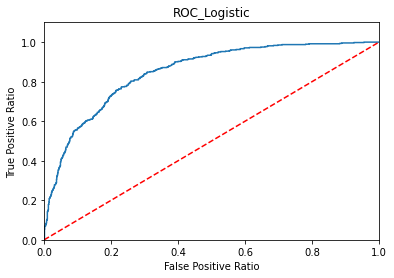

In [70]:
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC_Logistic')
plt.show();

### GB (GRADIENT BOOSTING)

In [71]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,1000],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
